This is some interesting maths...

$\sum{}_{i=1}^{n} i = \frac{n(n+1)}{2}$

In [137]:
#imports
# %matplotlib widget
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from IPython.display import display_markdown
import datetime

from numpy import nan
from import_OMNI import read_OMNI, nan_value
from import_ACE import read_ACE
from entropy import H, MI, CMI, entropy_matrix
from storm_selection import findSeq



In [163]:
read_ACE("../ACE/ACE_Browse_Data.txt")

,ACE_epoch_time,B_rtn_r_MAG,B_rtn_t_MAG,B_rtn_n_MAG,B_rtn_theta_MAG,B_rtn_phi_MAG,B_gse_x_MAG,B_gse_y_MAG,B_gse_z_MAG,B_gse_theta_MAG,B_gse_phi_MAG,B_gsm_x_MAG,B_gsm_y_MAG,B_gsm_z_MAG,B_gsm_theta_MAG,B_gsm_phi_MAG,B_magnitude_MAG
0,2023-01-01 00:05:03,1.1502,-4.9787,-0.0107,-0.1204,283.0089,-1.1427,4.9461,-0.5839,-6.5619,103.0083,-1.1427,4.9367,0.6587,7.4069,103.0322,5.4925
1,2023-01-01 00:10:03,3.7434,-1.1570,1.7713,24.3269,342.8242,-3.7408,1.3593,1.6273,22.2374,160.0308,-3.7408,0.9159,1.9123,26.4054,166.2419,5.4064
2,2023-01-01 00:15:03,3.3670,1.1531,-0.0443,-0.7131,18.9046,-3.3688,-1.1452,0.0898,1.4455,198.7756,-3.3688,-1.1322,-0.1943,-3.1287,198.5767,5.1628
3,2023-01-01 00:20:03,1.6561,3.6129,-1.4787,-20.4087,65.3738,-1.6623,-3.7566,-1.0522,-14.3672,246.1304,-1.6623,-3.3852,-1.9389,-27.2080,243.8469,4.9798
4,2023-01-01 00:25:03,4.6768,0.8873,-0.6851,-8.1901,10.7430,-4.6784,-0.9530,-0.5770,-6.8910,191.5136,-4.6784,-0.7839,-0.7916,-9.4738,189.5122,5.1949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2023-12-31 23:40:03,-4.0319,2.0387,-2.5936,-29.8581,153.1772,4.0276,-2.3313,-2.3415,-26.7096,329.9362,4.0276,-1.6764,-2.8473,-33.1315,337.4011,5.2505
105116,2023-12-31 23:45:03,-4.0587,1.9551,-2.7174,-31.0975,154.2802,4.0545,-2.2626,-2.4741,-28.0515,330.8366,4.0545,-1.5785,-2.9579,-34.2087,338.7279,5.3579
105117,2023-12-31 23:50:03,-4.4413,2.5749,-0.9352,-10.3246,149.8963,4.4366,-2.6731,-0.6324,-6.9611,328.9304,4.4366,-2.4337,-1.2739,-14.1306,331.2535,5.2552
105118,2023-12-31 23:55:03,-4.4714,2.4002,-1.4450,-15.8937,151.7735,4.4669,-2.5586,-1.1590,-12.6882,330.1969,4.4669,-2.1936,-1.7542,-19.4179,333.8449,5.3065


In [118]:
df = read_OMNI(
    filepath="../OMNI/datasets/test_2.txt",
    formatpath="../OMNI/data_format/test_2_format.txt",
)
print(list(df))


c:\Users\Aarnav\Downloads\UROP2024\UROP2024\src\import_OMNI.py:39: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(


KeyboardInterrupt: 

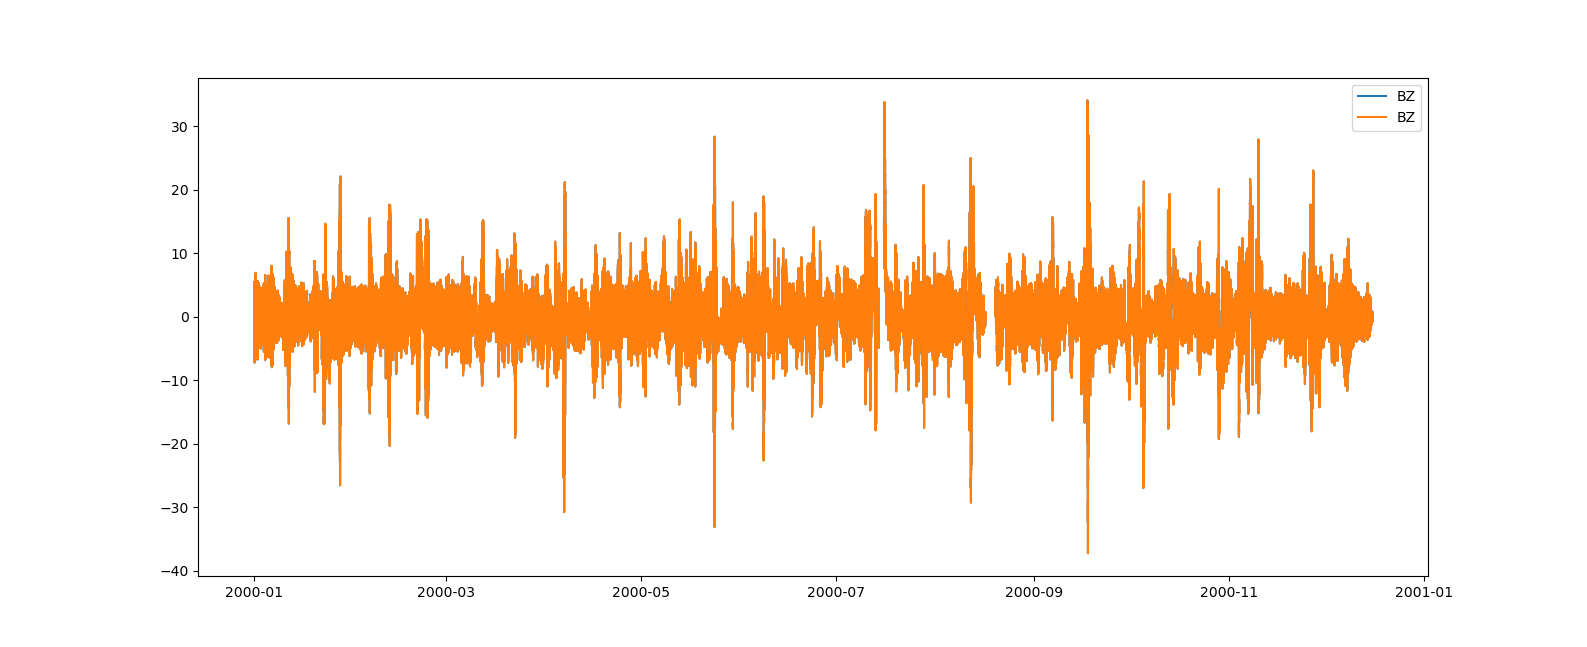

In [ ]:
# for column in list(df)[1:]:
    # plt.plot(df["Datetime"], df[column], label=column)
plt.plot(df["Datetime"], df["BZ"], label="BZ")
# plt.plot(df["Datetime"], df["SYM/H"], label="SYM/H")
# plt.hist(df["SYM/H"], 150)
plt.legend()
plt.show()

In [ ]:
em = entropy_matrix(df)
display_markdown(f'''| |{"|".join(df.columns[1:])}|
{"".join(["| :-"] * len(df.columns))}
{"\n".join([f"|{column_name}|{"|".join(map(lambda x: "%.2f" % x, em[i]))}|" for i, column_name in enumerate(df.columns[1:])])}
''',
raw = True)

| |Field|BX|BY|BZ|BY, (GSM)|BZ, (GSM)|RMS|RMS, nT|Speed|Vx|Vy|Vz|Proton|Proton, K|Na/Np|Flow|Electric|Plasma|Alfven|Magnetosonic|AE-index|AL-index|AU-index|SYM/D|SYM/H|ASY/D|ASY/H|
| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-| :-
|Field|5.57|0.48|0.78|0.47|0.72|0.51|0.03|0.05|0.19|0.18|0.11|0.08|0.22|0.07|-0.13|0.28|0.40|0.17|0.60|0.49|0.08|0.00|-0.49|0.08|0.11|-0.54|0.19|
|BX|0.48|5.88|0.29|0.09|0.27|0.10|0.02|0.03|0.14|0.14|0.10|0.06|0.10|0.07|-0.21|0.13|0.10|0.05|0.17|0.17|-0.02|-0.07|-0.59|0.04|-0.01|-0.64|0.06|
|BY|0.78|0.29|5.95|0.10|2.16|0.13|0.02|0.04|0.13|0.13|0.14|0.05|0.11|0.03|-0.20|0.15|0.11|0.04|0.23|0.23|0.03|-0.04|-0.54|0.06|0.04|-0.60|0.11|
|BZ|0.47|0.09|0.10|5.52|0.11|1.51|0.02|0.02|0.12|0.11|0.07|0.10|0.13|0.04|0.02|0.15|1.36|0.02|0.11|0.12|0.17|0.10|-0.43|0.07|0.06|-0.58|0.15|
|BY, (GSM)|0.72|0.27|2.16|0.11|5.93|0.10|0.02|0.04|0.12|0.12|0.13|0.04|0.12|0.03|-0.03|0.15|0.09|0.03|0.20|0.21|0.02|-0.04|-0.54|0.05|0.02|-0.61|0.10|
|BZ, (GSM)|0.51|0.10|0.13|1.51|0.10|5.61|0.02|0.03|0.12|0.12|0.07|0.09|0.11|0.04|-0.03|0.14|2.99|0.02|0.14|0.15|0.26|0.17|-0.36|0.07|0.09|-0.55|0.20|
|RMS|0.03|0.02|0.02|0.02|0.02|0.02|1.82|0.34|-0.04|-0.04|-0.04|-0.05|-0.00|-0.03|-0.23|0.01|-0.05|-0.05|-0.04|-0.05|-0.05|-0.10|-0.61|0.01|-0.10|-0.69|0.02|
|RMS, nT|0.05|0.03|0.04|0.02|0.04|0.03|0.34|3.82|-0.12|-0.13|-0.14|-0.15|-0.15|-0.09|-0.76|-0.12|-0.15|-0.18|-0.17|-0.16|-0.04|-0.09|-0.61|0.02|-0.10|-0.68|0.02|
|Speed|0.19|0.14|0.13|0.12|0.12|0.12|-0.04|-0.12|6.66|5.46|0.18|0.14|0.30|0.39|0.26|0.15|0.18|0.06|0.10|0.22|0.06|0.01|-0.52|0.08|0.15|-0.58|0.13|
|Vx|0.18|0.14|0.13|0.11|0.12|0.12|-0.04|-0.13|5.46|6.64|0.17|0.13|0.30|0.38|0.23|0.15|0.18|0.06|0.10|0.22|0.06|0.01|-0.52|0.08|0.15|-0.58|0.13|
|Vy|0.11|0.10|0.14|0.07|0.13|0.07|-0.04|-0.14|0.18|0.17|5.45|0.07|0.07|0.16|-0.30|0.08|0.09|0.02|0.05|0.07|-0.03|-0.07|-0.59|0.03|-0.06|-0.66|0.04|
|Vz|0.08|0.06|0.05|0.10|0.04|0.09|-0.05|-0.15|0.14|0.13|0.07|5.35|0.06|0.08|-0.75|0.06|0.12|0.02|0.04|0.05|-0.03|-0.07|-0.60|0.03|-0.07|-0.67|0.03|
|Proton|0.22|0.10|0.11|0.13|0.12|0.11|-0.00|-0.15|0.30|0.30|0.07|0.06|5.21|0.10|0.17|0.87|0.09|0.08|0.13|0.14|-0.01|-0.06|-0.57|0.06|0.08|-0.64|0.06|
|Proton, K|0.07|0.07|0.03|0.04|0.03|0.04|-0.03|-0.09|0.39|0.38|0.16|0.08|0.10|3.01|-0.85|0.07|0.06|0.02|0.05|0.06|-0.02|-0.07|-0.59|0.02|-0.06|-0.67|0.04|
|Na/Np|-0.13|-0.21|-0.20|0.02|-0.03|-0.03|-0.23|-0.76|0.26|0.23|-0.30|-0.75|0.17|-0.85|4.97|-0.00|-0.25|-0.40|-0.41|0.36|-0.37|-0.09|-0.78|0.30|-0.39|-0.63|-1.24|
|Flow|0.28|0.13|0.15|0.15|0.15|0.14|0.01|-0.12|0.15|0.15|0.08|0.06|0.87|0.07|-0.00|4.49|0.16|0.04|0.18|0.21|0.03|-0.03|-0.51|0.07|0.01|-0.61|0.11|
|Electric|0.40|0.10|0.11|1.36|0.09|2.99|-0.05|-0.15|0.18|0.18|0.09|0.12|0.09|0.06|-0.25|0.16|4.85|0.04|0.12|0.12|0.28|0.20|-0.35|0.07|0.09|-0.53|0.22|
|Plasma|0.17|0.05|0.04|0.02|0.03|0.02|-0.05|-0.18|0.06|0.06|0.02|0.02|0.08|0.02|-0.40|0.04|0.04|0.67|0.40|0.12|-0.06|-0.10|-0.63|0.00|-0.11|-0.70|-0.01|
|Alfven|0.60|0.17|0.23|0.11|0.20|0.14|-0.04|-0.17|0.10|0.10|0.05|0.04|0.13|0.05|-0.41|0.18|0.12|0.40|3.81|1.64|-0.04|-0.08|-0.61|0.02|-0.04|-0.66|0.03|
|Magnetosonic|0.49|0.17|0.23|0.12|0.21|0.15|-0.05|-0.16|0.22|0.22|0.07|0.05|0.14|0.06|0.36|0.21|0.12|0.12|1.64|5.67|-0.02|-0.07|-0.59|0.04|-0.02|-0.65|0.05|
|AE-index|0.08|-0.02|0.03|0.17|0.02|0.26|-0.05|-0.04|0.06|0.06|-0.03|-0.03|-0.01|-0.02|-0.37|0.03|0.28|-0.06|-0.04|-0.02|5.19|1.70|1.14|0.08|0.26|0.23|0.36|
|AL-index|0.00|-0.07|-0.04|0.10|-0.04|0.17|-0.10|-0.09|0.01|0.01|-0.07|-0.07|-0.06|-0.07|-0.09|-0.03|0.20|-0.10|-0.08|-0.07|1.70|4.71|0.53|0.08|0.26|0.21|0.34|
|AU-index|-0.49|-0.59|-0.54|-0.43|-0.54|-0.36|-0.61|-0.61|-0.52|-0.52|-0.59|-0.60|-0.57|-0.59|-0.78|-0.51|-0.35|-0.63|-0.61|-0.59|1.14|0.53|4.39|0.07|0.20|0.18|0.26|
|SYM/D|0.08|0.04|0.06|0.07|0.05|0.07|0.01|0.02|0.08|0.08|0.03|0.03|0.06|0.02|0.30|0.07|0.07|0.00|0.02|0.04|0.08|0.08|0.07|3.82|0.14|0.12|0.10|
|SYM/H|0.11|-0.01|0.04|0.06|0.02|0.09|-0.10|-0.10|0.15|0.15|-0.06|-0.07|0.08|-0.06|-0.39|0.01|0.09|-0.11|-0.04|-0.02|0.26|0.26|0.20|0.14|5.31|0.27|0.37|
|ASY/D|-0.54|-0.64|-0.60|-0.58|-0.61|-0.55|-0.69|-0.68|-0.58|-0.58|-0.66|-0.67|-0.64|-0.67|-0.63|-0.61|-0.53|-0.70|-0.66|-0.65|0.23|0.21|0.18|0.12|0.27|4.49|0.29|
|ASY/H|0.19|0.06|0.11|0.15|0.10|0.20|0.02|0.02|0.13|0.13|0.04|0.03|0.06|0.04|-1.24|0.11|0.22|-0.01|0.03|0.05|0.36|0.34|0.26|0.10|0.37|0.29|4.10|


In [ ]:
inds, ranges=findSeq(-df["SYM/H"],20,100,6*60, return_ranges=True)
# plt.plot(df["Datetime"], df["SYM/H, nT"])


Min / max thresholds are: 20.00 , 100.00
15 sequences found.
Joining two sequences next to each other (within the threshold).
Joining two sequences next to each other (within the threshold).


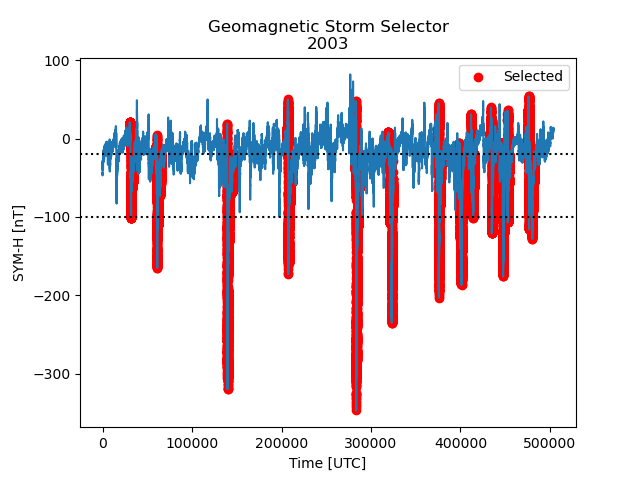

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

In [ ]:
plt.figure()
plt.plot(df["SYM/H"])
plt.scatter(df["Datetime"].iloc[inds].index,df["SYM/H"].iloc[inds],color='r',label='Selected')
plt.axhline(-20,color='k',linestyle=':')
plt.axhline(-100,color='k',linestyle=':')
plt.title('Geomagnetic Storm Selector\n2003')
plt.xlabel('Time [UTC]')
plt.ylabel('SYM-H [nT]')

plt.legend()
plt.show()

In [ ]:
storm_entropies = [H(df["SYM/H"].iloc[range(storm[0], storm[1])]) for storm in ranges]

print(f"Nominal SYM/H entropy: {H(df["SYM/H"])}")
print(f"Storm SYM/H entropies: {storm_entropies} \nAverage storm entropy (per storm): {sum(storm_entropies)/len(storm_entropies)}")
print(f"Storm entropies calculated taking storms as a set of datapoints: {H(df["SYM/H"].iloc[inds])}")
# we can initially discern a large increase in information describing SYM/H

Nominal SYM/H entropy: 5.312488293617374
Storm SYM/H entropies: [6.212106944881131, 6.3425537416489775, 5.9143392309094, 6.688358153140376, 6.452986381554365, 6.763289217993692, 6.944527311953678, 6.924064236060779, 6.493469653778293, 6.410410009295125, 6.793241997978076, 6.373514930328498, 6.790725228277255] 
Average storm entropy (per storm): 6.546429772138434
Storm entropies calculated taking storms as a set of datapoints: 6.354118491416385


In [ ]:
# evaluating average entropies of all stats in a storm
stormy_H = np.array([H(df[column].iloc[inds]) for column in list(df)[1:]])

nominal_H =  np.array([H(df[column]) for column in list(df)[1:]])

stormy_H - nominal_H

In [ ]:
def find_bin_num(func, default = 100):
    bin_num = default
    while not np.isclose(func(bin_num), func(bin_num-50)):
        bin_num += 100
    return bin_num


In [ ]:
def gradient_desc(f, initial = 100, step_size = 100, weight = 1):
    x = initial
    grad = f(x+step_size) - f(x)
    while not np.isclose(grad,0):
        print(x, grad)
        x += int(grad*step_size*weight)
        grad = f(x+step_size) - f(x)
        
    return x+step_size
   

In [ ]:
[find_bin_num(lambda x: H(df[column], bins=x)) for column in list(df)[1:]]

[4800,
 5800,
 6900,
 7200,
 6700,
 7200,
 1200,
 2300,
 7400,
 7500,
 4900,
 4900,
 7100,
 59700,
 700,
 4200,
 5700,
 47100,
 1800,
 200,
 3400,
 3100,
 2600,
 200,
 500,
 500,
 700]